In [1]:
import numpy as np

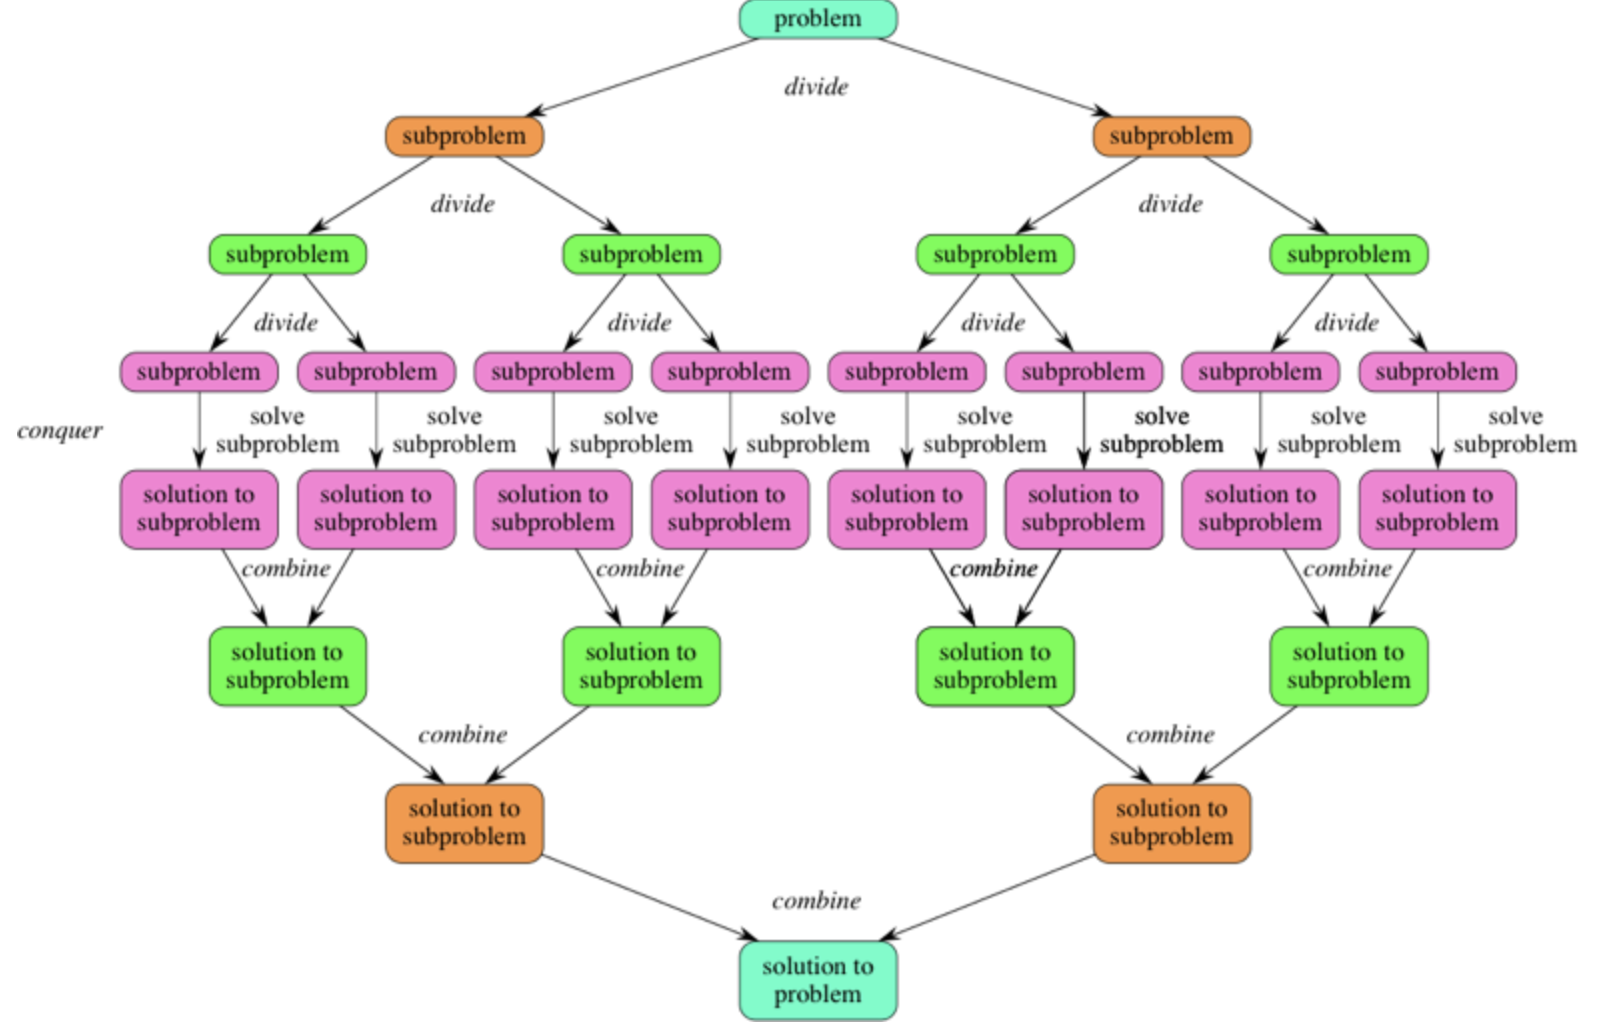

# Ejemplos

## Multiplicación

Mientras estudiaba los números complejos, Gauss se dio cuenta de que el producto de dos números, definido como:

$$
(a+bi)(c+di) = ac - bd + (bc+ad)i
$$

Podía calcularse utilizando 3 multiplicaciones, en vez de las 4 aparentes. Esto se debe a que:

$$
bc+ad = (a+b)(c+d)-ac-bd
$$

---

Para ver para qué nos sirve esto, consideremos a dos enteros $x$ y $y$, ambos representados con $n$ bits. Por conveniencia, asumimos que $n$ es una potencia de 2, aunque el procedimiento para el caso general es muy similar.

Como primer paso, partimos a $x$ a la mitad. Definimos a las dos partes resultantes como $x_L$ (izquierda) y $x_R$ (derecha). Notemos que podemos recuperar a $x$ de estas dos partes de la siguiente manera:

$$
x = x_L \oplus x_R
$$

Donde $\oplus$ es el operador de concatenación, que "pega" a sus dos operandos. Otra manera de obtener $x$ usando solo operaciones aritméticas es de la siguiente forma:

$$
x = 2^{n/2}\cdot x_L+x_R
$$

Por ejemplo, si $x=10110110$, entonces $x_L=1011$ y $x_R=0110$, 

$$
x=1011\cdot 2^4 + 0110
$$

Hacemos lo mismo para $y$, partiéndola en $y_L$ y $y_R$. Con esto, el producto de $x$ y $y$ puede escribirse como:

$$
x\cdot y = \left(2^{n/2}\cdot x_L+x_R\right)\left(2^{n/2}\cdot y_L+y_R\right)
$$

Esto es equivalente a:

$$
x\cdot y = 2^n x_Ly_L + 2^{n/2}(x_Ly_R+x_Ry_L) + x_Ry_R
$$

Las sumas tienen una complejidad $O(n)$. Por otro lado, las multiplicaciones por potencias de 2 pueden realizarse utilizando *bit shifts*, los cuales igual tienen complejidad $O(n)$. Entonces, las partes importantes son los 4 productos:

$$
x_Ly_L,\quad x_Ly_R,\quad x_Ry_L,\quad x_Ry_R
$$

Cada uno de estos números ($x_L$, $x_R$, etc.), tiene un tamaño ${n}/{2}$. Por lo tanto, si resolvemos esta multiplicación con el mismo algoritmo, obtenemos la siguiente relación de recurrencia:

$$
T(n) = 4T\left(\frac{n}{2}\right) + O(n)
$$

Aplicando el teorema maestro, llegamos a que $T(n)=O\left(n^2\right)$, que es lo mismo que el algoritmo de multiplicación de primaria.

---

Sin embargo, podemos aplicar el truco de Gauss de una manera similar a la del caso complejo, notando que:

$$
\begin{align}
    x_Ly_R + x_Ry_L = (x_L+x_R)(y_L+y_R) - x_Ly_L - x_Ry_R
\end{align}
$$

Entonces, pasamos de 4 multiplicaciones a 3, lo cual significa que la relación de recurrencia es ahora:

$$
T(n) = 3T\left(\frac{n}{2}\right) + O(n)
$$

Usando el teorema maestro, llegamos a que la complejidad es:

$$
T(n) = O\left(n^{\log_23}\right) \approx O\left(n^{1.59}\right)
$$

Una clara mejoría de nuestro primer intento.

## Mediana

Dada una lista de $n$ números $L$, queremos calcular su mediana. La solución más obvia es ordenarla (que toma tiempo $O(n\log n)$), y luego encontrar el elemento de en medio (que toma tiempo $O(n)$). Sin embargo, hay una mejor solución.

Irónicamente, para resolver esto, sirver considerar un problema más general: dada una lista de números, encontrar el $k$-ésimo elemento más pequeño. Algunos casos particulares son:

* $k=1$, en cuyo caso el resultado es el mínimo.
* $k=n$, el máximo.
* $k=\left\lceil\frac{n}{2}\right\rceil$, la mediana.

Ahora, supongamos que para un número arbitrario $v$, partimos la lista en tres sublistas:

* $L_L$, los números más pequeños que $v$.
* $L_v$, los números iguales a $v$.
* $L_R$, los números mayores a $v$.

Por ejemplo, si tenemos $v=5$ y la lista:

$$
L = [2, 36, 5, 21, 8, 13, 11, 20, 5, 4, 1]
$$

Las tres sublistas resultantes son:

$$
L_L = [2, 4, 1],\qquad L_v = [5, 5], \qquad L_R = [36, 21, 8, 13, 11, 20]
$$



Ahora, supongamos que queremos el octavo elemento más pequeño. Con esta información, sabemos que tenemos que tomar el **tercer** elemento de la lista $L_R$, ya que $|L_L| + |L_v| = 5$. En otras palabras, si tenemos una función $f(L, k)$ que produce el resultado deseado, tenemos que:

$$
f(L, 8) = f(L_R, 3)
$$

En general, la relación de recurrencia para un $k$ arbitrario es:

$$
f = 
\begin{cases}
f(L_L, k) & \text{si}\ k\leq |L_L| \\
v & \text{si}\ |L_L| < k \leq |L_L| + |L_v| \\
f(L_R, k - |L_L| - |L_v|) & \text{si}\ k > |L_L| + |L_v|
\end{cases}
$$

Las sublistas $L_L, L_v, L_R$ pueden calcularse en tiempo lineal. Sin embargo, falta decidir el valor de $v$. Idealmente, nos gustaría que fuese tal que:

$$
|L_L| \approx |L_R| \approx \frac{|L|}{2}
$$

Si esto pasase, entonces el tiempo de ejecución cumpliría la relación:

$$
T(n) = T\left(\frac{n}{2}\right) + O(n)
$$

Sin embargo, esto requiere que $v$ sea la mediana, i.e., nuestro objetivo. Entonces, seguimos una alternativa sencilla: escogemos $v$ *aleatoriamente*.

---

Los casos extremos de esta estrategia son:

**Peor caso** 

Escogemos el número más grande (o el más pequeño) en cada iteración. Entonces nuestra lista solo se encoge por un elemento cada vez. Por lo tanto, el número de iteraciones es del orden:

$$
n + (n-1) + (n-2) + \cdots 1 \sim O(n^2)
$$

**Mejor caso** 

Escogemos la mediana en cada iteración. Por lo tanto, el número de iteraciones es del orden $O(n)$.

Sin embargo, es muy poco probable que cualquiera de estos dos casos ocurra. 

---

En general, decimos que una elección de $v$ es *buena* si cae entre los percentiles 25 y 75 de la lista. Si cumple esta propiedad, entonces $L_L$ y $L_R$ cumplen:

$$
|L_L| \leq \frac{3}{4}|L|,\qquad |L_R|\leq \frac{3}{4}|L|
$$

Dado que 50% de los elementos caen dentro de estos percentiles, ¿cuántas veces, en promedio, tenemos que muestrear $v$ antes de obtener un valor *bueno*? 

Esto es equivalente a preguntar cuántas veces tenemos que tirar una moneda antes de que salga águila. Si en la primera tirada es águila, ya acabamos. Si en la primera25 y 75 tirada es sol, tenemos que repetir. Si $x$ es el número de tiros, de esto se sigue la ecuación:

$$
x = \frac{1}{2}\cdot 1 + \frac{1}{2}(1+x)
$$

Resolviendo, obtenemos $x=2$. 

---

Por lo tanto, regresando a nuestro problema original, esto nos dice que después de dos iteraciones **en promedio**, la lista se habrá encogido a $3/4$ de su tamaño original. Entonces, si $T(n)$ es el tiempo de ejecución **promedio**, tenemos la relación de recurrencia:

$$
T(n) = T\left(\frac{3n}{4}\right) + O(n)
$$

Usando el teorema maestro, se sigue que la complejidad **promedio** es $O(n)$.

---

Finalmente, podemos escribir este algoritmo:

In [2]:
def k_smallest(L, k):
    v = np.random.choice(L)
    LL, Lv, LR = [], [], []
    for x in L:
        if x < v:
            LL.append(x)
        elif x == v:
            Lv.append(x)
        else:
            LR.append(x)

    if k <= len(LL):
        return k_smallest(LL, k)
    elif len(LL) < k <= len(LL) + len(Lv):
        return v
    else:
        return k_smallest(LR, k - len(LL) - len(Lv))

In [3]:
L = np.random.randint(0, 21, 15)
print(list(L))
k_smallest(L, len(L)//2)

[17, 16, 9, 6, 17, 10, 19, 14, 5, 2, 18, 19, 5, 13, 7]


10

# Ejercicios

## Ejercicio 1

Dado un arreglo $L$, para índices $i, j$ con $i<j$, decimos que $L_i$ y $L_j$ forman una *inversión* si $L_i>L_j$. Por ejemplo, el arreglo:

$$
L = [2, 4, 1, 3, 5]
$$

Tiene tres inversiones: $(2,1),(4,1),(4,3)$.

Diseña un algoritmo de divide y vencerás que cuente el número de inversiones en un arreglo. Este debe de correr en tiempo $O(n\log n)$.

**Solución:**
Retomando el ejercicio 1 de la práctica *08 Algoritmos de ordenamiento*, realizamos las siguientes modificaciones:

1. `merge_sort_and_count`: Las inversiones (o volteos) se agregarán a una lista. Por ello, las sentencias `return` fueron modificadas para devolver tres elementos: El arreglo ordenado, el conteo de inversiones, y ahora, la lista de parejas que constituyen una inversión. Y para todas aquellas llamadas recursivas, nos interesa ahora "atrapar" los 3 valores de retorno; entonces, se agregó una tercer variable para atrapar los 3 valores de retorno que ahora devuelve la función. 

2. `merge_and_count`: En esta función tenemos que agregar la parte donde se enlistan los pares de inversiones (además de contarlos). Para ello, cuando se encuentra una inversión `(left[i] <= right[j] == false)`, notamos que todos los `left[k]` restantes en el lado izquierdo también son mayores que `right[j]`, y por lo tanto también forman inversiones con `right[j]`. Por lo tanto, debemos agregar todos los pares `(left[k], right[j])` con los elementos restantes en a la izquierda.

    *Ejemplo:* Se tienen los siguientes pasos al hacer *merge_sort* a la lista $L = [2, 4, 8, 1, 7, 3, 6, 5]$

    1. $24817365$

    2. $2481 \qquad 7365$

    3. $24 \qquad 81 \qquad 73 \qquad 65$

    4. $2 \qquad 4 \qquad 8 \qquad 1 \qquad 7 \qquad 3 \qquad 6 \qquad 5$

    5. $24 \qquad 18 \qquad 37 \qquad 56$

    6. $1248 \qquad 3567$
    
    7. $12345678$

    Al hacer la fusión de 6 a 7 tenemos:

    $1248 \rightarrow $ left

    $3567 \rightarrow $ right
    
    Vemos que al comparar:
    - `left[2] > right[0]` +1 inversion `(4,3)`
    - `left[3] > right[3]` +1 inversion `(8,7)`
    
    Al agregar `(4,3)` tambien debemos agregar los pares con los elementos restantes en `left[k]`, esto es `(8,3)`, pero si hubieran más elementos del lado izquierdo, también deberían agregarse los pares que se forman.

3. `count_inversions`:  Se agregó la variable para "atrapar" la lista de pares que ahora devuelve `merge_sort_and_count` y la devuelve para dar el resultado final.

In [4]:
# Código de la solución de la práctica 8
def merge_sort_and_count(A):
    if len(A) <= 1:
        return A, 0, [] # se regresa una lista vacía para el caso base
    mid = len(A) // 2
    left, left_inversions, left_pairs = merge_sort_and_count(A[:mid]) # se añade left_pairs
    right, right_inversions, right_pairs = merge_sort_and_count(A[mid:]) # se añade right_pairs
    merged, merge_inversions, merge_pairs = merge_and_count(left, right) # se añade merge_pairs
    total_inversions = left_inversions + right_inversions + merge_inversions
    total_pairs = left_pairs + right_pairs + merge_pairs # se añade total_pairs
    return merged, total_inversions, total_pairs # se regresa total_pairs al igual que las otras variables que ya teniamos

def merge_and_count(left, right):
    i = j = 0
    merged = []
    inversions = 0
    pairs = [] # se añade la lista de pares
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            for k in range(i, len(left)): # se añaden los pares
                pairs.append((left[k], right[j])) # se añaden los pares
            j += 1
            inversions += len(left) - i
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged, inversions, pairs # se regresa la lista de pares

def count_inversions(A):
    _, total_volteos, pairs = merge_sort_and_count(A) # se añade pairs
    return total_volteos, pairs # se regresa la lista de pares

Test cases

In [5]:
L = [2, 4, 8, 1, 7, 3, 6, 5]
print(L)
print(count_inversions(L))

[2, 4, 8, 1, 7, 3, 6, 5]
(12, [(8, 1), (2, 1), (4, 1), (7, 3), (6, 5), (7, 5), (7, 6), (4, 3), (8, 3), (8, 5), (8, 6), (8, 7)])


In [6]:
A = np.random.randint(0, 5, 5)
print(A)
print(count_inversions(A))

[0 2 0 0 1]
(3, [(2, 0), (2, 0), (2, 1)])


In [7]:
A = np.random.randint(-3, 3, 6)
print(A)
print(count_inversions(A))

[ 2 -2  1 -1 -3 -1]
(10, [(2, -2), (2, 1), (-1, -3), (-2, -3), (1, -3), (2, -3), (1, -1), (2, -1), (1, -1), (2, -1)])


## Ejercicio 2

Diseña un algoritmo de divide y vencerás que invierta un arreglo. Por ejemplo, $[1,2,3,4]$ se vuelve $[4,3,2,1]$.

**Solución**: El enfoque de este algoritmo consiste en dividir la lista por la mitad recursivamente (similar a merge sort) hasta llegara listas con tamaño 1, y al regresar de las llamadas recursivas se iran invirtriendo las sublistas hasta invertir las dos mitades que completan toda la lista.

1. *Caso base*: Si el arreglo tiene longitud 1 o 0, se devuelve el arreglo tal y como esta, ya que no se necesita invertir nada.
2. Si el arreglo tiene más de un elemento, se divide por la mitad en dos arreglos.
3. Se llama a la la función de manera recursiva en cada mitad. Esto es para invertir la mitad izquierda y la mitad derecha por separado.
4. Al hacer el `return` se invierten los dos elementos (sublistas ya invertidas), hasta llegar a la inversión de toda la lista.

***Análisis de complejidad***

- *Tiempo*: En cada llamada recursiva, el arreglo se divide a la mitad, y la función se llama dos veces dentro de sí misma. Esto corresponde a una expresión del tipo:

$$ T(n) = 2T(\frac{n}{2}) + O(n) $$

donde $O(n)$ es el costo por concatenar los arreglos. Y como se sabe de ejemplos anteriores, la expresión anterior (similar a Merge Sort) tiene complejidad $O(n \log n)$

- *Espacio:* Cada nivel de recursión crea copias de los subarreglos `left` y `right`, lo que requiere espacio adicional lineal $O(n)$ para cada nivel. Y como cada nivel divide a la mitad los elementos, tenemos $\log n$ niveles. Por lo tanto. La complejidad espacial es $O(n \log n)$

In [8]:
def reverse_array(A):
    # Caso base
    if len(A) <= 1:
        return A
    mid = len(A) // 2 # Se divide el arreglo en dos partes
    left = A[:mid]
    right = A[mid:]
    inv_left = reverse_array(left) # Se invierte la parte izquierda
    inv_right = reverse_array(right) # Se invierte la parte derecha
    return inv_right + inv_left # Se juntan las partes invertidas

Testcases

In [9]:
A = [1, 2, 3, 4]
reverse_array(A)

[4, 3, 2, 1]

In [10]:
A = list(np.random.randint(0, 5, 5))
print(A)
reverse_array(A)

[1, 3, 1, 4, 4]


[4, 4, 1, 3, 1]

In [11]:
L = [2, 4, 8, 1, 7, 3, 6, 5]
reverse_array(L)

[5, 6, 3, 7, 1, 8, 4, 2]